In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup

Pull in respective libraries to prepare the notebook environment.

In [2]:
!pip install nazi_symbols_classification-0.1.0-py3-none-any.whl

Processing ./nazi_symbols_classification-0.1.0-py3-none-any.whl


In [3]:
!pip install ultralytics  # install

from ultralytics import YOLO

!pip install roboflow
from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 20.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


# Classifier for nazi symbol detection

### Prepare dataset

In [ ]:
dataset_name = "nazi-symbols-detection"
dataset_path = f"/content/datasets/{dataset_name}"
rf = Roboflow(api_key="")
project = rf.workspace("zhiwei").project(dataset_name)
version = project.version(1)
dataset = version.download("folder", dataset_path)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/nazi-symbols-detection in folder:: 100%|██████████| 7510/7510 [00:04<00:00, 1748.27it/s]


In [ ]:
import shutil

shutil.move(f"{dataset_path}/valid", f"{dataset_path}/val")

'/content/datasets/nazi-symbols-detection/val'

### Training
Train a model to determine whether a given image contains nazi symbols or not.

In [ ]:
# Load a model
model = YOLO("yolo11s-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data=dataset_path, epochs=30, imgsz=640)

100%|██████████| 13.0M/13.0M [00:00<00:00, 97.1MB/s]


Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11s-cls.pt, data=/content/datasets/nazi-symbol-detection, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 5.35M/5.35M [00:00<00:00, 190MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/nazi-symbol-detection/train... 6561 images, 0 corrupt: 100%|██████████| 6561/6561 [00:01<00:00, 3822.60it/s]


train: New cache created: /content/datasets/nazi-symbol-detection/train.cache


val: Scanning /content/datasets/nazi-symbol-detection/val... 625 images, 0 corrupt: 100%|██████████| 625/625 [00:00<00:00, 1396.10it/s]

val: New cache created: /content/datasets/nazi-symbol-detection/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:10<00:00,  1.92it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:09<00:00,  2.01it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.74it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.68it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.69it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:10<00:00,  1.90it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:10<00:00,  1.95it/s]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30      3.29G     0.2194          1        640: 100%|██████████| 411/411 [04:24<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.67it/s]

                   all      0.891          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30       3.3G     0.1794          1        640: 100%|██████████| 411/411 [04:29<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30      3.29G     0.1897          1        640: 100%|██████████| 411/411 [04:28<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:13<00:00,  1.48it/s]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30       3.3G     0.1713          1        640: 100%|██████████| 411/411 [04:35<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.69it/s]

                   all      0.891          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30      3.29G     0.1566          1        640: 100%|██████████| 411/411 [04:25<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


      15/30       3.3G     0.1324          1        640: 100%|██████████| 411/411 [04:24<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.74it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30      3.29G     0.1131          1        640: 100%|██████████| 411/411 [04:32<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:09<00:00,  2.11it/s]

                   all      0.896          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30       3.3G     0.1192          1        640: 100%|██████████| 411/411 [04:33<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:12<00:00,  1.59it/s]

                   all      0.906          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30      3.29G     0.1078          1        640: 100%|██████████| 411/411 [04:31<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:10<00:00,  1.98it/s]

                   all      0.899          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30       3.3G    0.09181          1        640: 100%|██████████| 411/411 [04:29<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:13<00:00,  1.47it/s]

                   all      0.906          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30      3.29G    0.08002          1        640: 100%|██████████| 411/411 [04:24<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


      21/30       3.3G     0.0781          1        640: 100%|██████████| 411/411 [04:18<00:00,  1.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:12<00:00,  1.59it/s]

                   all      0.902          1



      Epoch    GPU_mem       loss  Instances       Size


      22/30      3.29G     0.0699          1        640: 100%|██████████| 411/411 [04:17<00:00,  1.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:09<00:00,  2.00it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30       3.3G    0.07916          1        640: 100%|██████████| 411/411 [04:22<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:10<00:00,  1.87it/s]

                   all      0.914          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30      3.29G    0.06162          1        640: 100%|██████████| 411/411 [04:21<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30       3.3G    0.05049          1        640: 100%|██████████| 411/411 [04:18<00:00,  1.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:12<00:00,  1.62it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30      3.29G    0.04499          1        640: 100%|██████████| 411/411 [04:17<00:00,  1.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]

                   all      0.914          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30       3.3G    0.04388          1        640: 100%|██████████| 411/411 [04:17<00:00,  1.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.82it/s]

                   all      0.912          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30      3.29G    0.03645          1        640: 100%|██████████| 411/411 [04:13<00:00,  1.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30       3.3G    0.03388          1        640: 100%|██████████| 411/411 [04:12<00:00,  1.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]

                   all      0.918          1



      Epoch    GPU_mem       loss  Instances       Size


      30/30      3.29G    0.03142          1        640: 100%|██████████| 411/411 [04:12<00:00,  1.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.71it/s]

                   all      0.917          1



30 epochs completed in 2.322 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 11.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 11.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-cls summary (fused): 112 layers, 5,436,690 parameters, 0 gradients, 12.0 GFLOPs
train: /content/datasets/nazi-symbol-detection/train... found 6561 images in 2 classes ✅ 
val: /content/datasets/nazi-symbol-detection/val... found 625 images in 2 classes ✅ 
test: /content/datasets/nazi-symbol-detection/test... found 313 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:12<00:00,  1.67it/s]


                   all      0.918          1
Speed: 0.7ms preprocess, 2.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


### Validation

In [ ]:
model = YOLO("runs/classify/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-cls summary (fused): 112 layers, 5,436,690 parameters, 0 gradients, 12.0 GFLOPs
train: /content/datasets/nazi-symbol-detection/train... found 6561 images in 2 classes ✅ 
val: /content/datasets/nazi-symbol-detection/val... found 625 images in 2 classes ✅ 
test: /content/datasets/nazi-symbol-detection/test... found 313 images in 2 classes ✅ 


val: Scanning /content/datasets/nazi-symbol-detection/val... 625 images, 0 corrupt: 100%|██████████| 625/625 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]


                   all      0.918          1
Speed: 0.6ms preprocess, 5.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

UTF-8


In [ ]:
!cp -r /content/runs/classify/train /content/drive/MyDrive/yolo11s-cls-nazi-symbol-detection

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

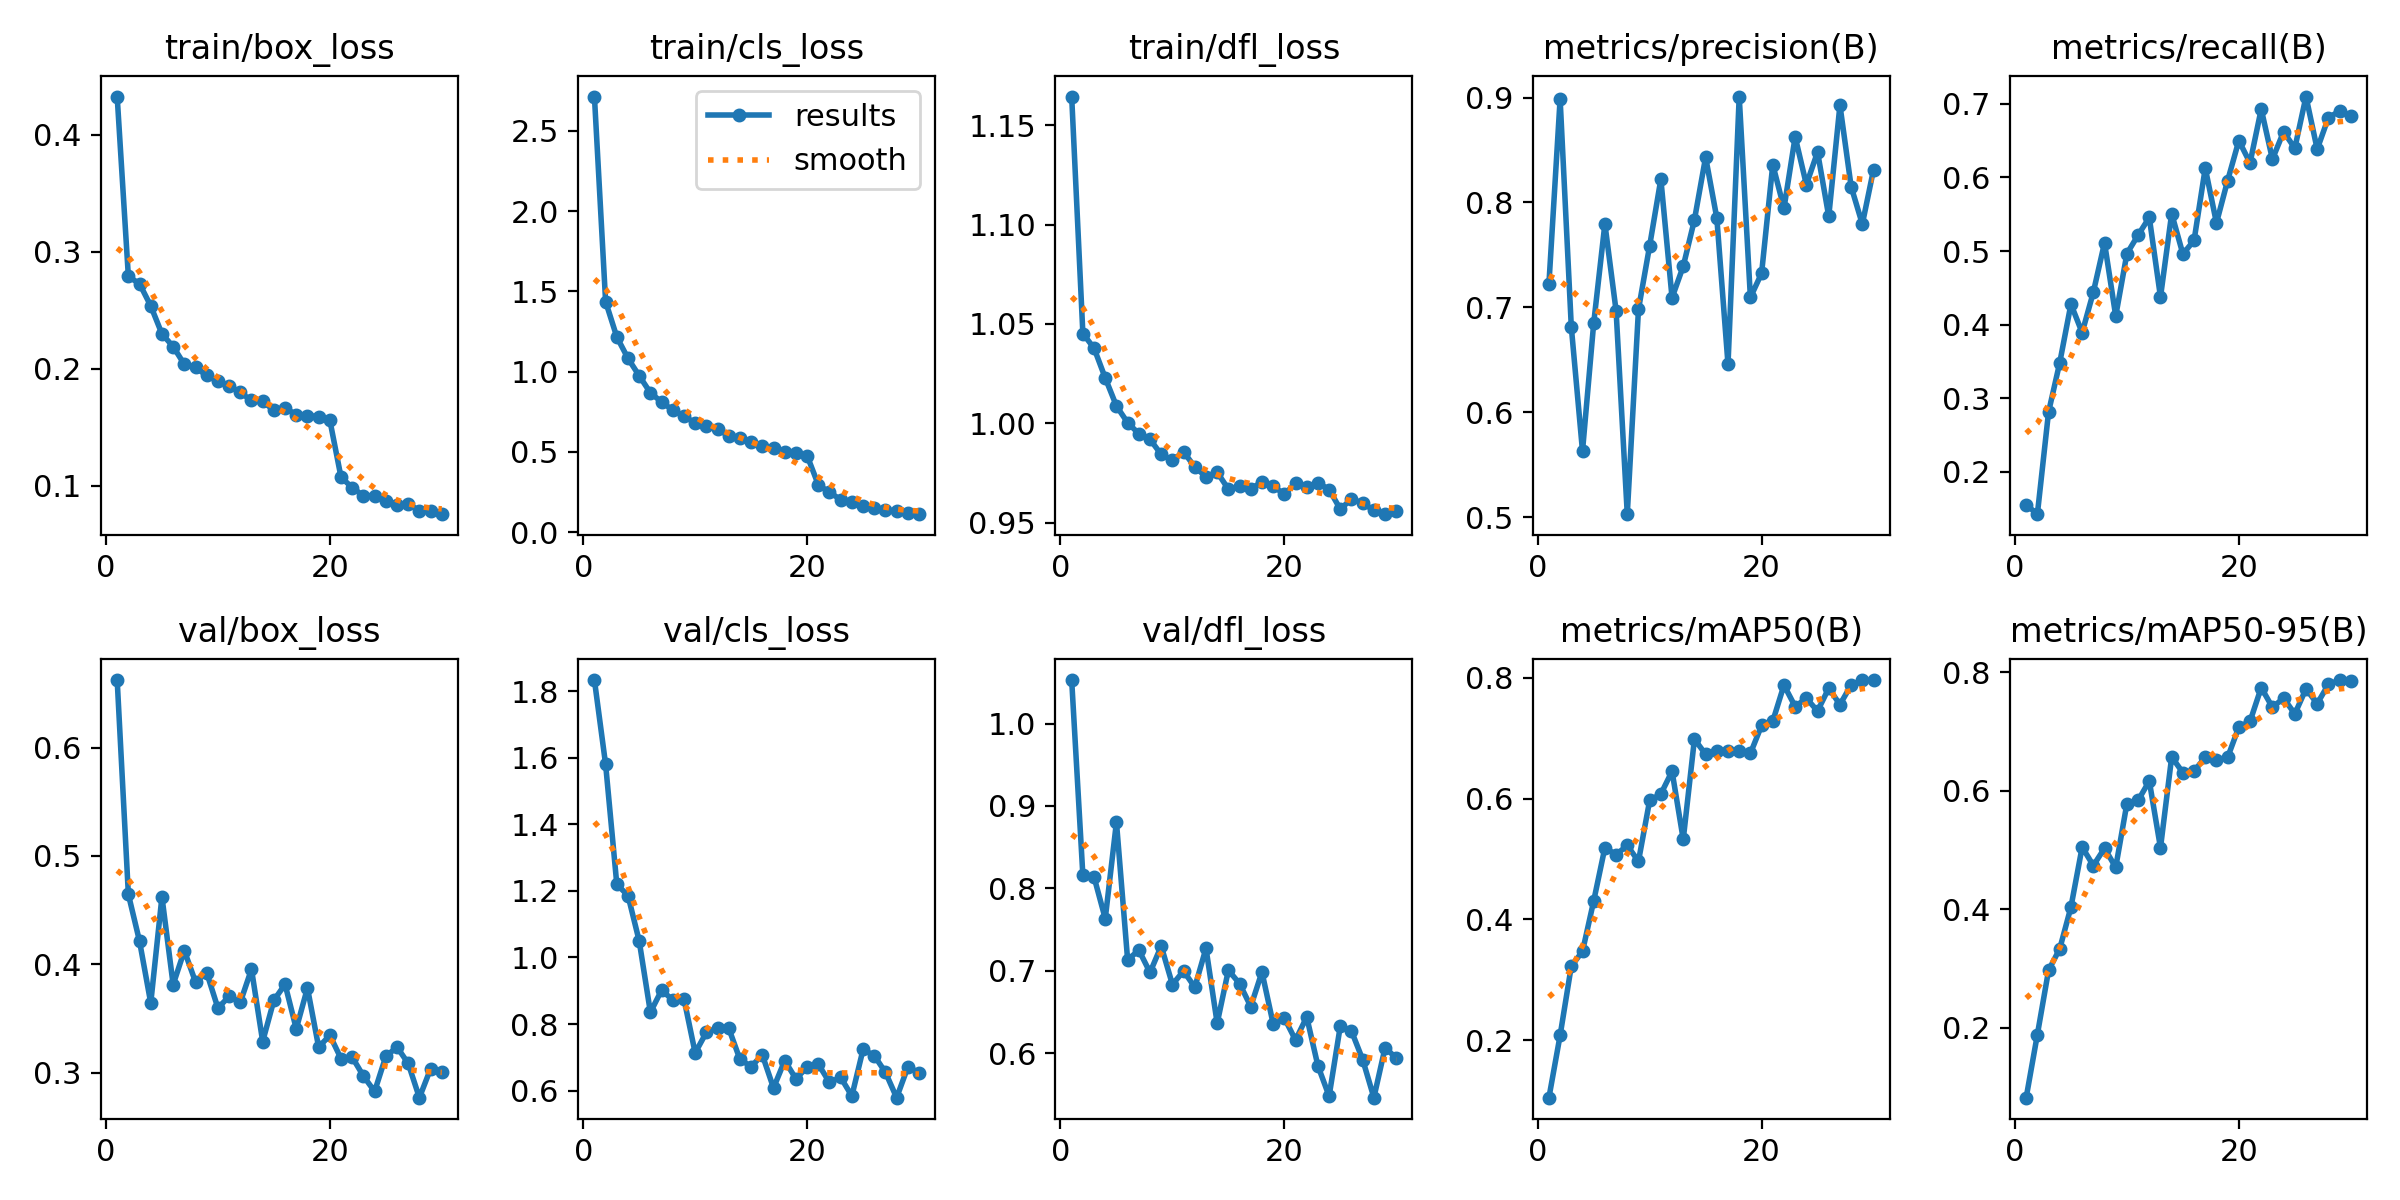

In [ ]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/yolo11s-cls-nazi-symbol-detection/results.png', width=1000)  # view results.png

# Multiple nazi symbol classification model

### Prepare dataset

In [20]:
dataset_name = "nazi-symbols-classification"
dataset_path = f"/content/datasets/{dataset_name}"
rf = Roboflow(api_key="")
project = rf.workspace("zhiwei").project(dataset_name)
version = project.version(2)
dataset = version.download("folder", dataset_path)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/nazi-symbols-classification in folder:: 100%|██████████| 3276/3276 [00:00<00:00, 5150.85it/s]


In [5]:
import os
import shutil
os.getcwd()

'/content'

In [21]:
def reorganise_images(path="/content/datasets/nazi-symbols-classification"):
    sub_folders = ["train", "test", "valid"]
    for sub_folder_name in sub_folders:
        sub_folder_path = os.path.join(path, sub_folder_name)
        for dir_name in os.listdir(sub_folder_path):
            if dir_name.startswith("."):
                continue
            elif " " in dir_name:
                classes = dir_name.split(" ")
                dir_path = os.path.join(sub_folder_path, dir_name)
                for class_dir in classes:
                    shutil.copytree(dir_path, os.path.join(sub_folder_path, class_dir), dirs_exist_ok=True)
                shutil.rmtree(dir_path)

In [22]:
reorganise_images()

In [23]:
!rm -rf /content/datasets/nazi-symbols-classification/train/non-nazi
!rm -rf /content/datasets/nazi-symbols-classification/test/non-nazi
!rm -rf /content/datasets/nazi-symbols-classification/valid/non-nazi

In [25]:
!mkdir /content/datasets/nazi-symbols-classification/test/identitaere_bewegung_emblem && cp /content/datasets/nazi-symbols-classification/train/identitaere_bewegung_emblem/identitaere-bewegung-112-_v-img__16__9__xl_-d31c35f8186ebeb80b0cd843a7c267a0e0c81647_jpg.rf.56a291f19ae9a5bd9b940a1f1e62377b.jpg /content/datasets/nazi-symbols-classification/test/identitaere_bewegung_emblem/identitaere-bewegung-112-_v-img__16__9__xl_-d31c35f8186ebeb80b0cd843a7c267a0e0c81647_jpg.rf.56a291f19ae9a5bd9b940a1f1e62377b.jpg
!mkdir /content/datasets/nazi-symbols-classification/test/judenstern && cp /content/datasets/nazi-symbols-classification/train/judenstern/31a4a05e32d4457b116de39b281e937ff2a7da70_full_jpg.rf.a915af114109fbe6e74132052d0a2fe3.jpg /content/datasets/nazi-symbols-classification/test/judenstern/31a4a05e32d4457b116de39b281e937ff2a7da70_full_jpg.rf.a915af114109fbe6e74132052d0a2fe3.jpg
!mkdir /content/datasets/nazi-symbols-classification/test/national_rebirth_poland && cp /content/datasets/nazi-symbols-classification/train/national_rebirth_poland/472px-National_Revival_of_Poland_logo-svg_png_jpg.rf.cb77630b8650ef60772e2db0a54fe44b.jpg /content/datasets/nazi-symbols-classification/test/national_rebirth_poland/472px-National_Revival_of_Poland_logo-svg_png_jpg.rf.cb77630b8650ef60772e2db0a54fe44b.jpg
!mkdir /content/datasets/nazi-symbols-classification/test/sturmabteilung_emblem && cp /content/datasets/nazi-symbols-classification/train/sturmabteilung_emblem/217525-jpg_png_jpg.rf.eb0460c19f48efccd4f00862b514c6ba.jpg /content/datasets/nazi-symbols-classification/test/sturmabteilung_emblem/217525-jpg_png_jpg.rf.eb0460c19f48efccd4f00862b514c6ba.jpg

In [26]:
def get_image_paths(path="/content/datasets/nazi-symbols-classification"):
    image_paths = []
    sub_folders = ["train", "test", "valid"]
    for sub_folder_name in sub_folders:
        sub_folder_path = os.path.join(path, sub_folder_name)
        for dir_name in os.listdir(sub_folder_path):
            if dir_name.startswith("."):
                continue
            dir_path = os.path.join(sub_folder_path, dir_name)
            image_paths += [os.path.join(dir_path, file) for file in os.listdir(dir_path) if not dir_name.startswith(".")]
    return image_paths

In [27]:
image_paths = get_image_paths()
len(image_paths)

2342

In [28]:
from nazi_symbols_classification.image_processing import (
    auto_resize, grayscale, auto_adjust_contrast,
    randomly_flip_image, randomly_rotate_image, randomly_shear_image,
    randomly_change_image_hue_saturation_brightness,
    randomly_change_image_contrast_brightness, randomly_blur_image,
    randomly_add_noise
)
from nazi_symbols_classification.constants import FlipDirection
from nazi_symbols_classification.pipeline import Pipeline


preprocessing_pipeline = Pipeline([
    ("auto_resize", auto_resize, dict(new_width=640, new_height=640)),
    ("grayscale", grayscale, None),
    ("auto_adjust_contrast", auto_adjust_contrast, None),
])

In [29]:
preprocessing_pipeline.run(image_paths)

In [30]:
training_image_paths = [path for path in image_paths if path.startswith("/content/datasets/nazi-symbols-classification/train/")]
len(training_image_paths)

1411

In [31]:
augmentation_pipeline = Pipeline([
    ("randomly_flip_image", randomly_flip_image,
     dict(directions=(FlipDirection.HORIZONTALLY, FlipDirection.VERTICALLY))),
    ("randomly_rotate_image", randomly_rotate_image, dict(angle_range=15)),
    ("randomly_shear_image", randomly_shear_image,
     dict(vertical_angle_range=10, horizontal_angle_range=10)),
    ("randomly_change_image_hue", randomly_change_image_hue_saturation_brightness,
     dict(hue_range=15, saturation_range=0, brightness_range=0)),
    ("randomly_change_image_saturation",
     randomly_change_image_hue_saturation_brightness,
     dict(hue_range=0, saturation_range=0.25, brightness_range=0)),
    ("randomly_change_image_brightness",
     randomly_change_image_hue_saturation_brightness,
     dict(hue_range=0, saturation_range=0, brightness_range=0.15)),
    ("randomly_change_image_exposure",
     randomly_change_image_contrast_brightness,
     dict(sign=0, contrast_control=1, brightness_range_percentage=0.1)),
    ("randomly_blur_image", randomly_blur_image, dict(ksize_range=7)),
    ("randomly_add_noise", randomly_add_noise, dict(prob_range=0.001)),
])

In [32]:
augmentation_pipeline.run(training_image_paths, skip_prob=0.5)

In [33]:
image_paths = get_image_paths()
len(image_paths)

8683

In [34]:
import shutil

shutil.move(f"{dataset_path}/valid", f"{dataset_path}/val")

'/content/datasets/nazi-symbols-classification/val'

### Training
Train a model to determine whether a given image contains nazi symbols or not.

In [35]:
# Load a model
model = YOLO("yolo11s-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data=dataset_path, epochs=20, imgsz=640)

100%|██████████| 13.0M/13.0M [00:00<00:00, 108MB/s] 


Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11s-cls.pt, data=/content/datasets/nazi-symbols-classification, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 89.4MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/nazi-symbols-classification/train... 7752 images, 0 corrupt: 100%|██████████| 7752/7752 [00:01<00:00, 3993.03it/s]

train: New cache created: /content/datasets/nazi-symbols-classification/train.cache



val: Scanning /content/datasets/nazi-symbols-classification/val... 653 images, 0 corrupt: 100%|██████████| 653/653 [00:00<00:00, 2266.13it/s]


val: New cache created: /content/datasets/nazi-symbols-classification/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20      3.25G      3.441         16        640:   1%|          | 4/485 [00:03<06:28,  1.24it/s]

       1/20      3.25G      3.439         16        640:   1%|          | 5/485 [00:03<04:57,  1.61it/s]
100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]

                   all      0.643      0.905



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:08<00:00,  2.41it/s]

                   all       0.66      0.931



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.23it/s]

                   all      0.665      0.919



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all      0.689      0.931



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:12<00:00,  1.73it/s]

                   all      0.678      0.939



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]

                   all      0.701      0.943



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]

                   all      0.701      0.953



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all      0.706      0.945



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:11<00:00,  1.76it/s]

                   all      0.709      0.939



      Epoch    GPU_mem       loss  Instances       Size


      10/20      3.27G     0.4073          8        640: 100%|██████████| 485/485 [05:10<00:00,  1.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:11<00:00,  1.87it/s]

                   all      0.703      0.942



      Epoch    GPU_mem       loss  Instances       Size


      11/20      3.28G     0.3702          8        640: 100%|██████████| 485/485 [05:20<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.17it/s]

                   all      0.703      0.949



      Epoch    GPU_mem       loss  Instances       Size


      12/20      3.28G     0.3581          8        640: 100%|██████████| 485/485 [05:14<00:00,  1.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all      0.711      0.945



      Epoch    GPU_mem       loss  Instances       Size


      13/20      3.28G     0.3445          8        640: 100%|██████████| 485/485 [05:13<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:11<00:00,  1.87it/s]

                   all      0.712      0.953



      Epoch    GPU_mem       loss  Instances       Size


      14/20      3.27G     0.3379          8        640: 100%|██████████| 485/485 [06:31<00:00,  1.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:15<00:00,  1.37it/s]

                   all      0.708      0.942



      Epoch    GPU_mem       loss  Instances       Size


      15/20      3.28G     0.3301          8        640: 100%|██████████| 485/485 [06:57<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:16<00:00,  1.24it/s]

                   all      0.703      0.954



      Epoch    GPU_mem       loss  Instances       Size


      16/20      3.28G     0.3177          8        640: 100%|██████████| 485/485 [06:56<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:15<00:00,  1.36it/s]

                   all      0.721      0.954



      Epoch    GPU_mem       loss  Instances       Size


      17/20      3.28G     0.2968          8        640: 100%|██████████| 485/485 [06:53<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:14<00:00,  1.50it/s]

                   all      0.721      0.951



      Epoch    GPU_mem       loss  Instances       Size


      18/20      3.27G      0.291          8        640: 100%|██████████| 485/485 [06:59<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:15<00:00,  1.34it/s]

                   all      0.723      0.953



      Epoch    GPU_mem       loss  Instances       Size


      19/20      3.28G     0.2881          8        640: 100%|██████████| 485/485 [06:59<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:16<00:00,  1.25it/s]

                   all      0.727      0.951



      Epoch    GPU_mem       loss  Instances       Size


      20/20      3.28G     0.2763          8        640: 100%|██████████| 485/485 [06:54<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]

                   all      0.726      0.956



20 epochs completed in 2.007 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 11.1MB
Optimizer stripped from runs/classify/train/weights/best.pt, 11.1MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-cls summary (fused): 112 layers, 5,463,591 parameters, 0 gradients, 12.0 GFLOPs
train: /content/datasets/nazi-symbols-classification/train... found 7752 images in 23 classes ✅ 
val: /content/datasets/nazi-symbols-classification/val... found 653 images in 23 classes ✅ 
test: /content/datasets/nazi-symbols-classification/test... found 278 images in 23 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:10<00:00,  1.93it/s]


                   all      0.726      0.956
Speed: 0.6ms preprocess, 2.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


lr/pg0,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg1,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg2,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
metrics/accuracy_top1,▁▂▃▅▄▆▆▆▆▆▆▇▇▆▆▇▇███
metrics/accuracy_top5,▁▅▃▅▆▆█▇▆▆▇▇█▆██▇█▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/loss,█▄▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
val/loss,█▆▇▅▅▃▄▃▄▃▃▂▂▂▂▁▁▁▁▁
lr/pg0,4e-05


### Validation

In [36]:
model = YOLO("runs/classify/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-cls summary (fused): 112 layers, 5,463,591 parameters, 0 gradients, 12.0 GFLOPs
train: /content/datasets/nazi-symbols-classification/train... found 7752 images in 23 classes ✅ 
val: /content/datasets/nazi-symbols-classification/val... found 653 images in 23 classes ✅ 
test: /content/datasets/nazi-symbols-classification/test... found 278 images in 23 classes ✅ 


val: Scanning /content/datasets/nazi-symbols-classification/val... 653 images, 0 corrupt: 100%|██████████| 653/653 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]


                   all      0.726      0.956
Speed: 0.7ms preprocess, 5.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [37]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

UTF-8


In [40]:
!rm -rf /content/drive/MyDrive/yolo11s-cls-multiple-nazi-symbols/train

In [42]:
!cp -r /content/runs/classify/train /content/drive/MyDrive/yolo11s-cls-multiple-nazi-symbols

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

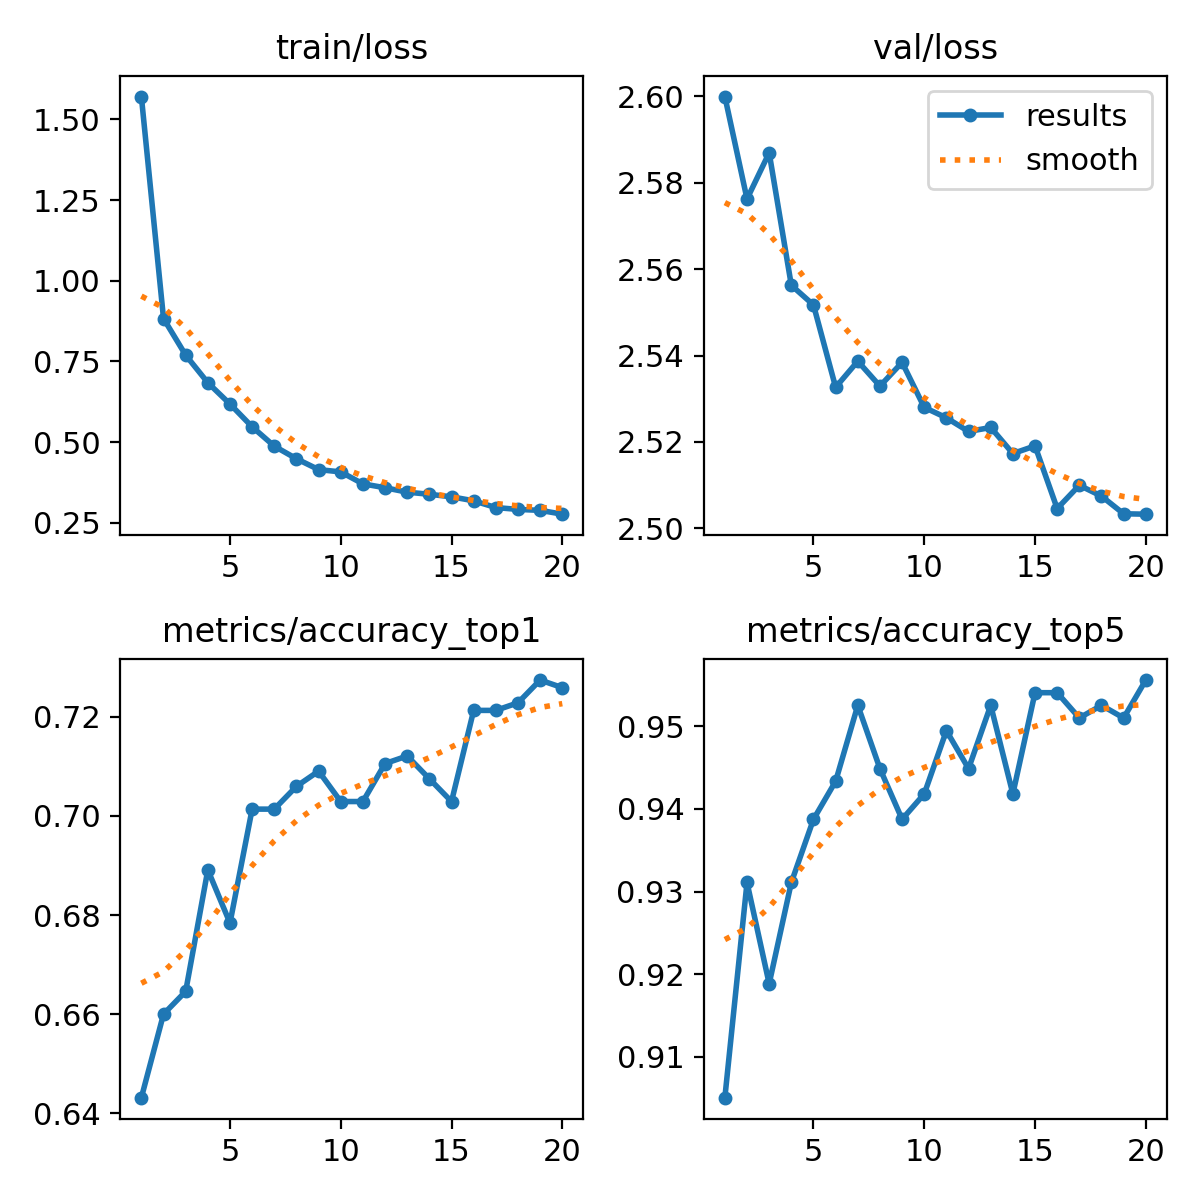

In [43]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/yolo11s-cls-multiple-nazi-symbols/results.png', width=1000)  # view results.png